In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [18]:
cols = ['engine_id', 'cycle', 'op1', 'op2', 'op3'] + \
       [f'sensor_{i}' for i in range(1, 22)]

df = pd.read_csv(
    '../data/raw/train_FD001.txt',
    delim_whitespace=True,
    header=None,
    names=cols
)


df.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_13200\541332991.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


,engine_id,cycle,op1,op2,op3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [19]:
cols = ['engine_id', 'cycle', 'op1', 'op2', 'op3'] + \
       [f'sensor_{i}' for i in range(1, 22)]

df.columns = cols


In [20]:
df.head()

,engine_id,cycle,op1,op2,op3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [21]:
df.dtypes

engine_id      int64
cycle          int64
op1          float64
op2          float64
op3          float64
sensor_1     float64
sensor_2     float64
sensor_3     float64
sensor_4     float64
sensor_5     float64
sensor_6     float64
sensor_7     float64
sensor_8     float64
sensor_9     float64
sensor_10    float64
sensor_11    float64
sensor_12    float64
sensor_13    float64
sensor_14    float64
sensor_15    float64
sensor_16    float64
sensor_17      int64
sensor_18      int64
sensor_19    float64
sensor_20    float64
sensor_21    float64
dtype: object

In [22]:
max_cycles = df.groupby('engine_id')['cycle'].max()

df['RUL'] = df['engine_id'].map(max_cycles) - df['cycle']


In [23]:
df[['engine_id', 'cycle', 'RUL']].tail()


,engine_id,cycle,RUL
20626,100,196,4
20627,100,197,3
20628,100,198,2
20629,100,199,1
20630,100,200,0


In [24]:
RUL_CAP = 130
df['RUL'] = df['RUL'].clip(upper=RUL_CAP)


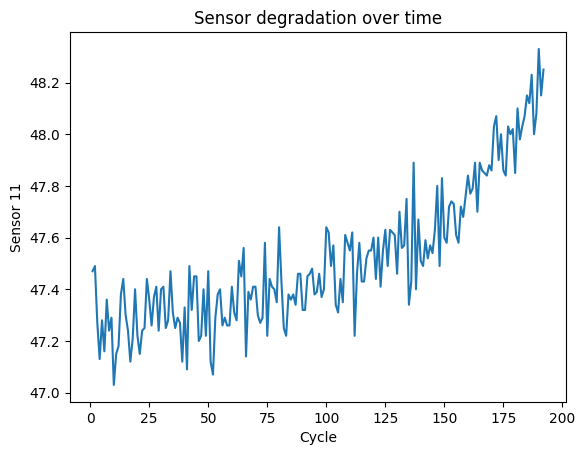

In [25]:
engine_id = 1
subset = df[df['engine_id'] == engine_id]

plt.plot(subset['cycle'], subset['sensor_11'])
plt.xlabel('Cycle')
plt.ylabel('Sensor 11')
plt.title('Sensor degradation over time')
plt.show()



In [26]:
df.shape
df['engine_id'].nunique()


100

FD001 contains 100 engines with multivariate sensor time-series data until failure.

In [27]:
df.std().sort_values()


sensor_1     0.000000e+00
op3          0.000000e+00
sensor_10    0.000000e+00
sensor_18    0.000000e+00
sensor_19    0.000000e+00
sensor_16    1.387812e-17
sensor_5     1.776400e-15
op2          2.930621e-04
sensor_6     1.388985e-03
op1          2.187313e-03
sensor_15    3.750504e-02
sensor_8     7.098548e-02
sensor_13    7.191892e-02
sensor_21    1.082509e-01
sensor_20    1.807464e-01
sensor_11    2.670874e-01
sensor_2     5.000533e-01
sensor_12    7.375534e-01
sensor_7     8.850923e-01
sensor_17    1.548763e+00
sensor_3     6.131150e+00
sensor_4     9.000605e+00
sensor_14    1.907618e+01
sensor_9     2.208288e+01
engine_id    2.922763e+01
RUL          4.344414e+01
cycle        6.888099e+01
dtype: float64

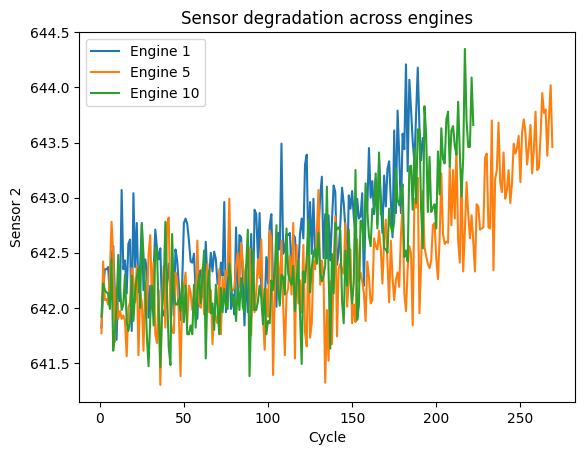

In [28]:
for eid in [1, 5, 10]:
    subset = df[df['engine_id'] == eid]
    plt.plot(subset['cycle'], subset['sensor_2'], label=f'Engine {eid}')

plt.legend()
plt.xlabel("Cycle")
plt.ylabel("Sensor 2")
plt.title("Sensor degradation across engines")
plt.show()
